In [105]:
variant =  ord('A') % 5 + 1
print('Variant: ', variant)

Variant:  1


In [106]:
import pandas
import cv2 
import matplotlib.pyplot as plt

In [107]:
data = pandas.read_excel('csv/lab6.xlsx').iloc[variant - 1]
data

N                               1
file name        emma-watson2.jpg
image size                300x300
glasses color                 red
line width                      2
Name: 0, dtype: object

In [108]:
def parse_color(color: str):
    match(color):   
        case 'blue':
            return (0, 0, 255)
        case 'cian':
            return (255, 255, 0)
        case 'red':
            return (255, 0, 0)
        case 'magenta':
            return (255, 0, 255)
        case 'yellow':
            return (0, 255, 255)    
color = parse_color(data['glasses color'])
line_width = data['line width']
print(color, line_width)

(255, 0, 0) 2


In [109]:
img = cv2.imread('images/' + data['file name'])
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [110]:
face_classifier = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [111]:
face = face_classifier.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(40, 40))

In [112]:
eyes_features = []

for (x, y, w, h) in face:    
    roi_gray = gray_image[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
    eyes = eye_cascade.detectMultiScale(roi_gray, scaleFactor=1.1, minNeighbors=5, minSize=(40, 40))
    for (ex, ey, ew, eh) in eyes:
        eyes_features.append((ex, ey, ew, eh))
radius = sum(eyes_features[0][2:4] + eyes_features[1][2:4]) // 8
cv2.circle(
    roi_color,
    (
        eyes_features[0][0] + eyes_features[0][2] // 2,
        eyes_features[0][1] + eyes_features[0][3] // 2
    ),
    radius, color, line_width
)
cv2.circle(
    roi_color,
    (
        eyes_features[1][0] + eyes_features[1][2] // 2,
        eyes_features[1][1] + eyes_features[1][3] // 2
    ),
    radius, color, line_width
)
cv2.line(
    roi_color,
    (
        eyes_features[0][0] + eyes_features[0][2] // 2 + radius,
        eyes_features[0][1] + eyes_features[0][3] // 2
    ),
    (
        eyes_features[1][0] + eyes_features[1][2] // 2 - radius,
        eyes_features[1][1] + eyes_features[1][3] // 2
    ),
    color, line_width
)
cv2.line(
    roi_color,
    (
        eyes_features[0][0] + eyes_features[0][2] // 2 - radius,
        eyes_features[0][1] + eyes_features[0][3] // 2
    ),
    (
        eyes_features[0][0] + eyes_features[0][2] // 2 - radius * 2,
        eyes_features[0][1] + eyes_features[0][3] // 2
    ),
    color, line_width
)
cv2.line(
    roi_color,
    (
        eyes_features[1][0] + eyes_features[1][2] // 2 + radius,
        eyes_features[1][1] + eyes_features[1][3] // 2
    ),
    (
        eyes_features[1][0] + eyes_features[1][2] // 2 + radius * 2,
        eyes_features[1][1] + eyes_features[1][3] // 2
    ),
    color, line_width
)

array([[[  7,   6,  16],
        [  4,   3,  12],
        [  4,   3,  12],
        ...,
        [122, 101,  70],
        [122, 101,  70],
        [124, 103,  72]],

       [[  4,   3,  13],
        [  4,   3,  12],
        [  4,   6,  14],
        ...,
        [124, 103,  72],
        [124, 103,  72],
        [124, 103,  72]],

       [[  6,   5,  14],
        [  4,   5,  15],
        [  5,   6,  16],
        ...,
        [124, 103,  72],
        [124, 103,  72],
        [124, 103,  72]],

       ...,

       [[ 21,   8,   6],
        [ 21,   8,   6],
        [ 23,  10,   8],
        ...,
        [ 32,  28,  47],
        [ 30,  26,  45],
        [ 30,  26,  45]],

       [[ 21,   8,   6],
        [ 21,   8,   6],
        [ 22,   9,   7],
        ...,
        [ 32,  28,  47],
        [ 30,  26,  45],
        [ 30,  26,  45]],

       [[ 21,   8,   6],
        [ 21,   8,   6],
        [ 22,   9,   7],
        ...,
        [ 32,  28,  47],
        [ 30,  26,  45],
        [ 30,  26,  45]]

(-0.5, 396.5, 537.5, -0.5)

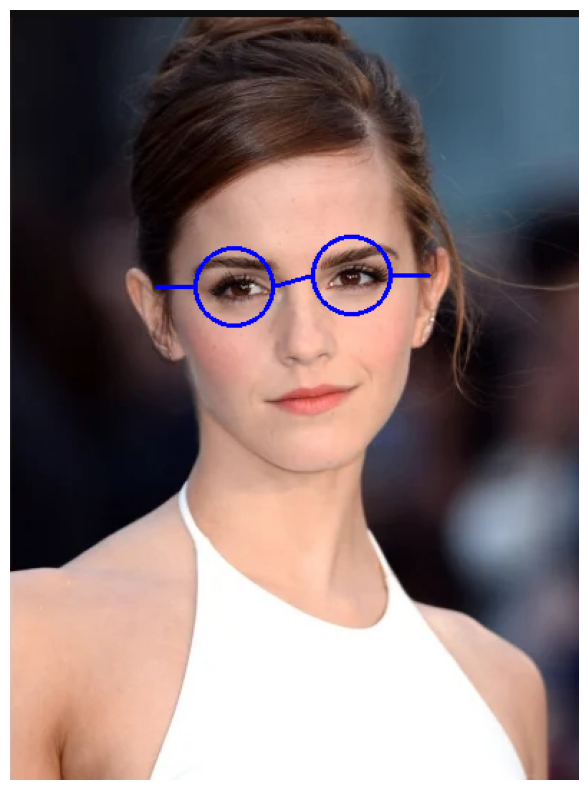

In [113]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20, 10))
plt.imshow(img_rgb)
plt.axis('off')